# LetsGrowMore :- Data Science Intern

# Beginner Level Task 01 - Iris Flowers Classification ML Project

# Name - Padale Tejas Chandrakant

**Importing libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

**Importing the dataset**

In [2]:
iris=sns.load_dataset('iris')

In [3]:
iris.head() #print top 5 values

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [4]:
iris.tail() #print last 5 values

sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

In [5]:
iris.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [6]:
iris.min()

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

**Data Exploration**

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
r,c = iris.shape
print("Number of rows = ",r)
print("Number of columns = ",c)

Number of rows =  150
Number of columns =  5


**Visualization**

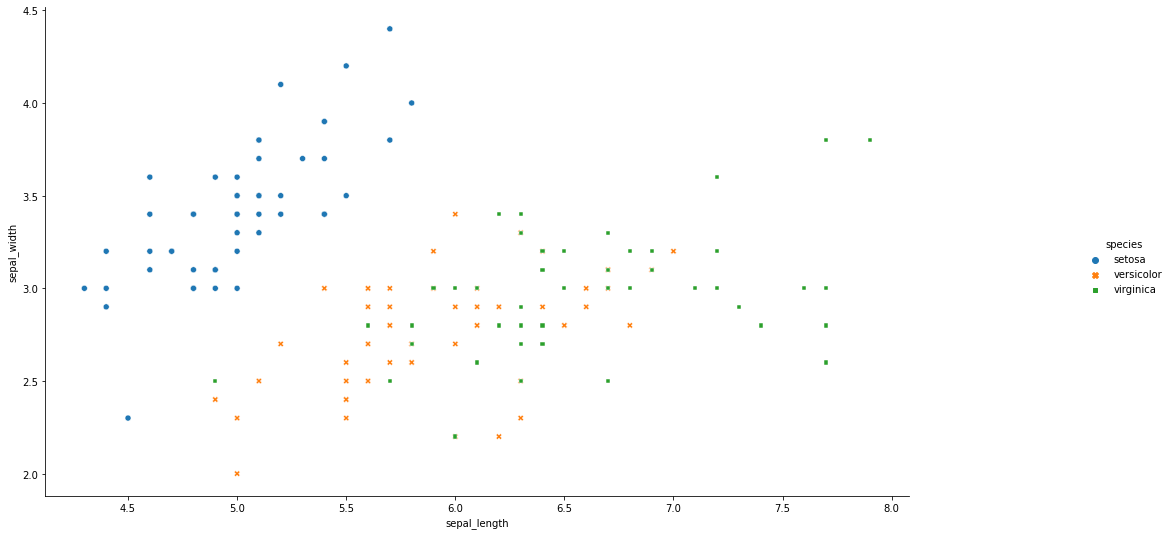

In [9]:
g=sns.relplot(x='sepal_length',y='sepal_width',data=iris,hue='species',style='species')
g.fig.set_size_inches(18,8)
plt.show()

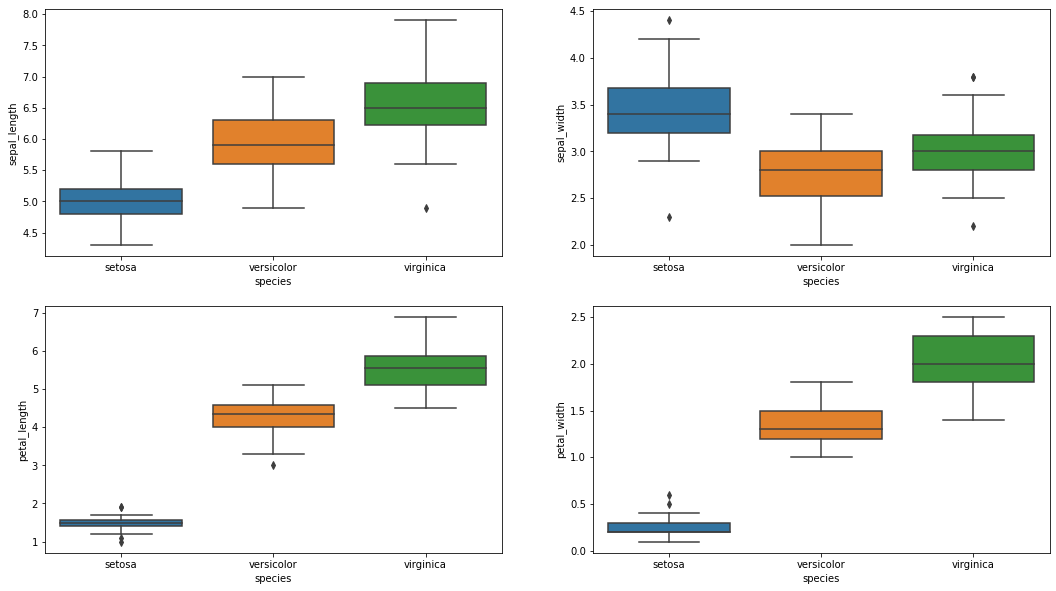

In [10]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='petal_width',data=iris)
plt.show()

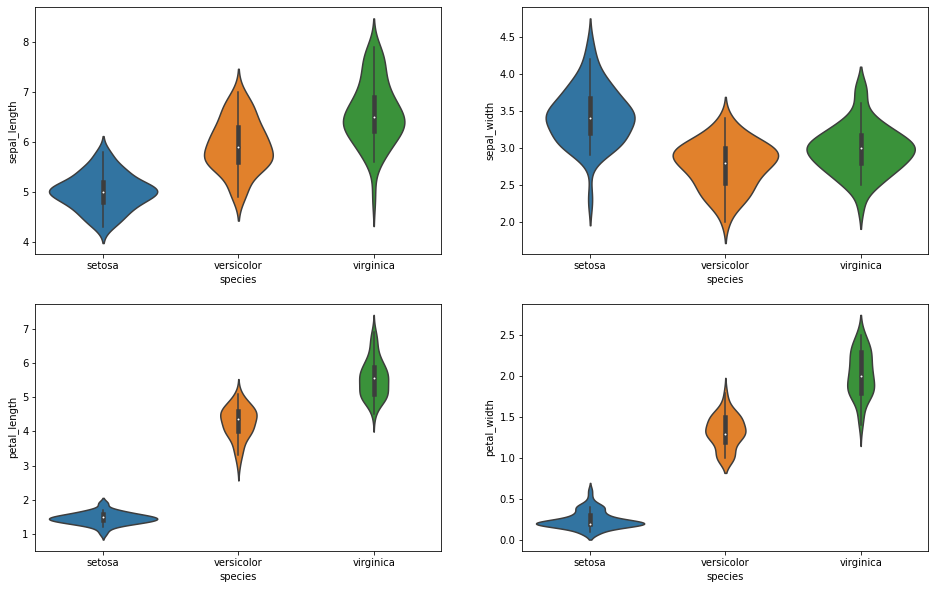

In [11]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal_width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal_width',data=iris)
plt.show()

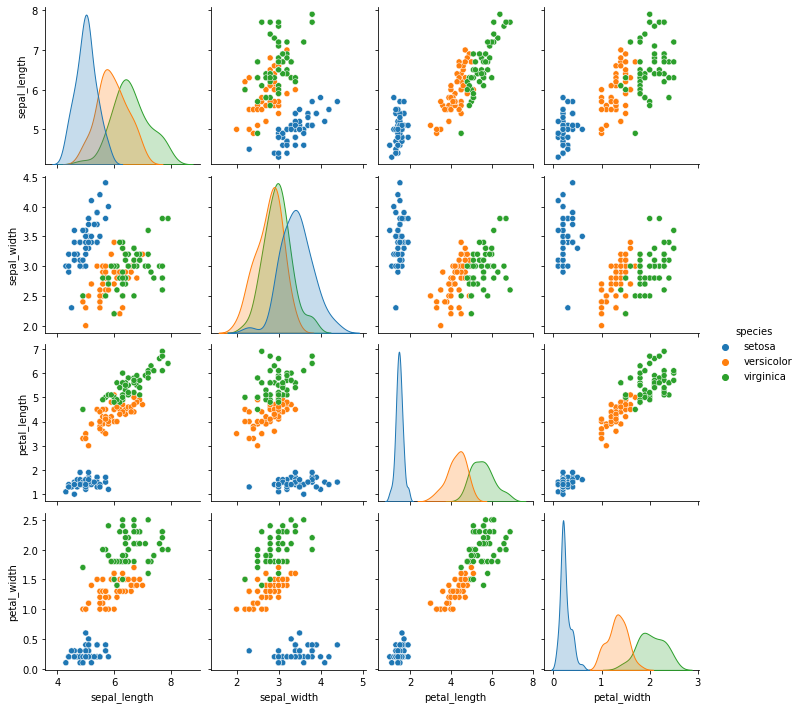

In [12]:
sns.pairplot(data=iris,hue='species')

**Correlation Matrix**

[]

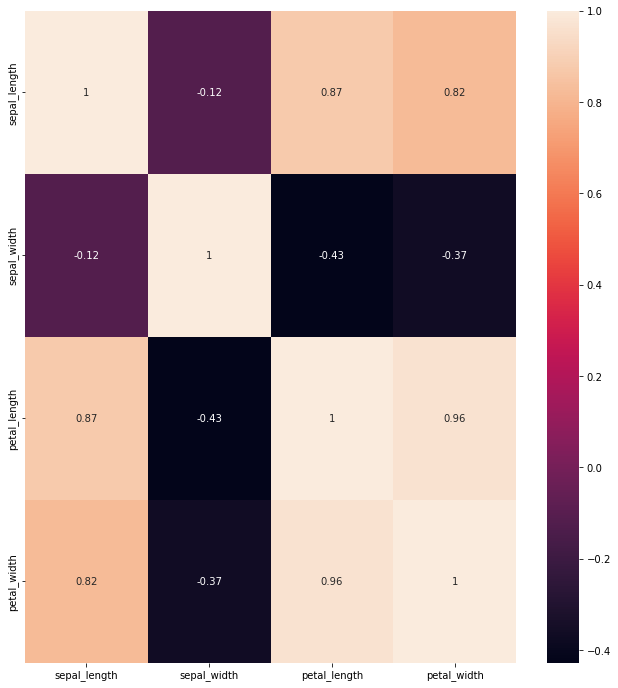

In [13]:
plt.figure(figsize=(11,12))
sns.heatmap(iris.corr(),annot=True)
plt.plot()

**Statistical Analysis**

In [14]:
iris.describe(include='all').T

count unique     top freq      mean       std  min  25%   50%  \
sepal_length  150.0    NaN     NaN  NaN  5.843333  0.828066  4.3  5.1   5.8   
sepal_width   150.0    NaN     NaN  NaN  3.057333  0.435866  2.0  2.8   3.0   
petal_length  150.0    NaN     NaN  NaN     3.758  1.765298  1.0  1.6  4.35   
petal_width   150.0    NaN     NaN  NaN  1.199333  0.762238  0.1  0.3   1.3   
species         150      3  setosa   50       NaN       NaN  NaN  NaN   NaN   

              75%  max  
sepal_length  6.4  7.9  
sepal_width   3.3  4.4  
petal_length  5.1  6.9  
petal_width   1.8  2.5  
species       NaN  NaN

In [15]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [16]:
x = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

**Metrics**

In [17]:
from sklearn.metrics import make_scorer,accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

**Model Selection**

In [18]:
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

**Logistic Regression**

In [19]:
lg = LogisticRegression(solver='lbfgs',max_iter=400)
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)
acc_lg = round(accuracy_score(y_test,y_pred)*100,2)
lg_acc = round(lg.score(x_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of Logistic Regression\n",cm)
print("Accuracy of Logistic Regression = ",acc)
print("Precision of Logistic Regression = ",prec)
print("Recall of Logistic Regression = ",recall)
print("f1 score of Logistic Regression = ",f1)

Confusion matrix of Logistic Regression
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy of Logistic Regression =  1.0
Precision of Logistic Regression =  1.0
Recall of Logistic Regression =  1.0
f1 score of Logistic Regression =  1.0


**K Nearest Neighbours**

In [20]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
acc_knn = round(accuracy_score(y_test,y_pred)*100,2)
knn_acc = round(knn.score(x_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of K Nearest Neighbour\n",cm)
print("Accuracy of K Nearest Neighbour = ",acc)
print("Precision of K Nearest Neighbour = ",prec)
print("Recall of K Nearest Neighbour = ",recall)
print("f1 score of K Nearest Neighbour = ",f1)

Confusion matrix of K Nearest Neighbour
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Accuracy of K Nearest Neighbour =  0.9666666666666667
Precision of K Nearest Neighbour =  0.9666666666666667
Recall of K Nearest Neighbour =  0.9666666666666667
f1 score of K Nearest Neighbour =  0.9666666666666667


**KNN**

C:\Users\tejas\AppData\Local\Temp/ipykernel_29056/3938692082.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a = pd.Series()


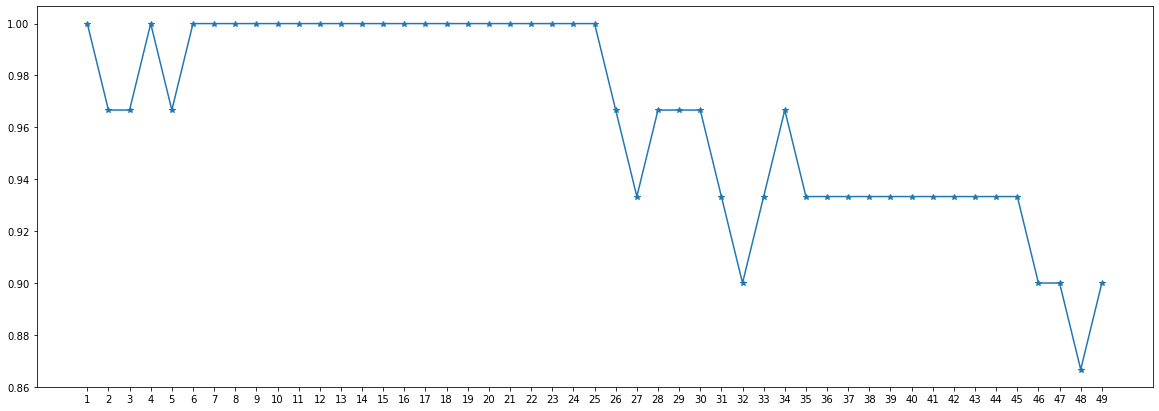

In [21]:
plt.figure(figsize=(20,7))
a_index = list(range(1,50))
a = pd.Series()
x = range(1,50)
for i in list(range(1,50)):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  prediction = model.predict(x_test)
  a = a.append(pd.Series(accuracy_score(y_test,prediction)))
plt.plot(a_index,a,marker="*")
plt.xticks(x)
plt.show()